In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/clock.xlsx')

In [ ]:
df.head()

,Age,Bidders,Price
0,127,13,1235
1,115,12,1080
2,127,7,845
3,150,9,1522
4,156,6,1047


In [ ]:
df.describe()

,Age,Bidders,Price
count,32.000000,32.000000,32.000000
mean,144.937500,9.531250,1327.156250
std,27.395476,2.839632,393.134395
min,108.000000,5.000000,729.000000
25%,117.000000,7.000000,1053.000000
50%,140.000000,9.000000,1257.500000
75%,168.500000,11.250000,1560.750000
max,194.000000,15.000000,2131.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Age      32 non-null     int64
 1   Bidders  32 non-null     int64
 2   Price    32 non-null     int64
dtypes: int64(3)
memory usage: 896.0 bytes


**Analysis**

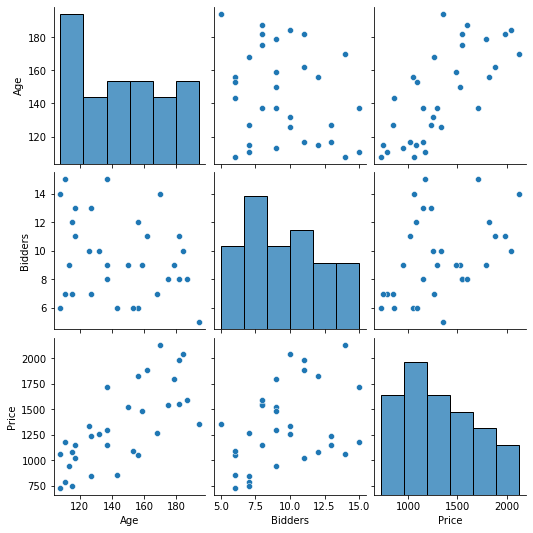

In [ ]:
sns.pairplot(df)

In [ ]:
print(df.corr())

              Age   Bidders     Price
Age      1.000000 -0.253749  0.730233
Bidders -0.253749  1.000000  0.394640
Price    0.730233  0.394640  1.000000


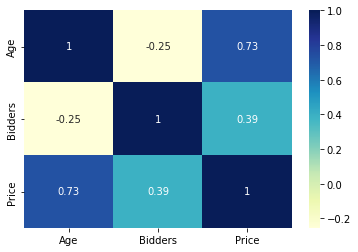

In [ ]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
mp.show()

** Regression Model**

In [ ]:
df_EV = df.iloc[:, [0,1]]
df_EV

,Age,Bidders
0,127,13
1,115,12
2,127,7
3,150,9
4,156,6
5,182,11
6,156,12
7,132,10
8,137,9
9,113,9


In [ ]:
df_DV = df.iloc[:, [2]]
df_DV

,Price
0,1235
1,1080
2,845
3,1522
4,1047
5,1979
6,1822
7,1253
8,1297
9,946


In [ ]:
#OLS Regression

import statsmodels.api as sm

X = df_EV[["Age", "Bidders"]]
y = df_DV["Price"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print out the statistics
model.summary()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     120.7
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           8.77e-15
Time:                        19:07:30   Log-Likelihood:                -200.35
No. Observations:                  32   AIC:                             406.7
Df Residuals:                      29   BIC:                             411.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1336.7221    173.356     -7.711      0.000   -1691.275    -982.169
Age           12.7362      0.902     14.114      0.000      10.891      14.582
Bidders       85.8151      8.706      9.857      0.000      68.010     103.620
==============================================================================
Omnibus:                        6.587   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                2.018
Skew:                           0.040   Prob(JB):                        0.365
Kurtosis:                       1.772   Cond. No.                     1.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""